<a href="https://colab.research.google.com/github/2239245168/Lab1_Yulin-Yang.ipynb/blob/main/lab_06_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 6

## Outline

Repeat exercises from Lab 5, but with the *SuperStore Retail Orders* dataset.  Your target variable is total sales revenue.  


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab_06_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Superstore Data Dictionary

 ORDER VARIABLES:
 - Order ID
 - Order Date
 - Order Year Month - Year and month of the order
 - Order Type - Was the order completed at a store or online? (Retail, Online)
 - Quantity - Quantity ordered for the product

 CUSTOMER VARIABLES:
 - Customer Name
 - City
 - State Province
 - Email


PRODUCT VARIABLES:
 - Product Name
 - Product Line - Category of the product (i.e. Bikes Phones)
 - Product Price - Price in US Dollars
 - Product Status - Current status of the product (Active, Inactive)

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [ ]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe.  
- If your record count doesn't match the source file, then resolve the issue

In [ ]:
url = "https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/Labs/DataSets/superstore_retail_orders.csv"
df = pd.read_csv(url)

# Check record count and basic info
print("DataFrame Shape:", df.shape)
df.info()
df.head()


DataFrame Shape: (56043, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56043 entries, 0 to 56042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56043 non-null  int64  
 1   order_date        56011 non-null  object 
 2   order_year_month  56011 non-null  object 
 3   customer_name     56043 non-null  object 
 4   city              55569 non-null  object 
 5   state_province    55569 non-null  object 
 6   email             56043 non-null  object 
 7   order_type        56043 non-null  object 
 8   quantity          56004 non-null  float64
 9   product_name      56043 non-null  object 
 10  product_line      56043 non-null  object 
 11  product_price     56043 non-null  float64
 12  product_status    56043 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 5.6+ MB


,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status
0,51188,2023-07-01,2023-07,Audrey Blanco,North Cherylmouth,New Hampshire,audrey_blanco@email.com,Retail,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
1,51187,2023-07-01,2023-07,Isaac Allen,Traceyland,West Virginia,isaac_allen@email.com,Online,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
2,51199,2023-07-02,2023-07,Ian Morgan,Dylanberg,South Dakota,ian_morgan@email.com,Online,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
3,51241,2023-07-04,2023-07,Alexa Bell,Lake Tracytown,Wisconsin,alexa_bell@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
4,51297,2023-07-08,2023-07,Casey Diaz,Byrdchester,Mississippi,casey_diaz@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to categories if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Create a total_amount variable, based on the product price and quantity

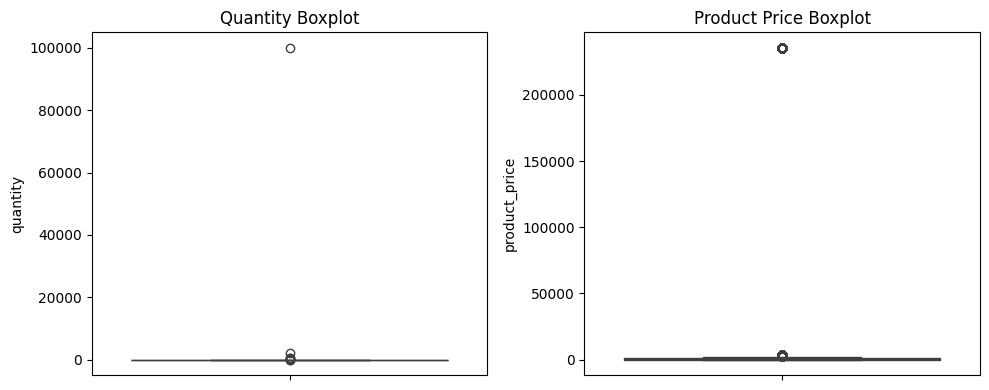

<class 'pandas.core.frame.DataFrame'>
Index: 54670 entries, 0 to 56042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   order_id          54670 non-null  int64   
 1   order_date        54639 non-null  object  
 2   order_year_month  54639 non-null  object  
 3   customer_name     54670 non-null  object  
 4   city              54201 non-null  object  
 5   state_province    54201 non-null  category
 6   email             54670 non-null  object  
 7   order_type        54670 non-null  category
 8   quantity          54670 non-null  float64 
 9   product_name      54670 non-null  object  
 10  product_line      54670 non-null  category
 11  product_price     54670 non-null  float64 
 12  product_status    54670 non-null  category
 13  total_amount      54670 non-null  float64 
dtypes: category(4), float64(3), int64(1), object(6)
memory usage: 4.8+ MB
None
   order_id  order_date order_year_month  custom

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假设你已经成功读取CSV到DataFrame df：
# df = pd.read_csv('superstore_retail.csv')
# print(df.columns.tolist())  # 查看列名

# 1. 将数值列转换为正确的数据类型
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')

# 2. 将合适的字符列转换为类别（category）
df['order_type'] = df['order_type'].astype('category')
df['product_line'] = df['product_line'].astype('category')
df['product_status'] = df['product_status'].astype('category')
df['state_province'] = df['state_province'].astype('category')

# 3. 检查并移除异常值
#    （示例使用 boxplot 辅助判断，并根据业务知识设置阈值）
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
sns.boxplot(y=df['quantity'])
plt.title('Quantity Boxplot')

plt.subplot(1,2,2)
sns.boxplot(y=df['product_price'])
plt.title('Product Price Boxplot')

plt.tight_layout()
plt.show()

# 这里假设：quantity 大于 1000 或 product_price 大于 5000 的行属于异常
df = df[df['quantity'] < 1000]
df = df[df['product_price'] < 5000]

# 4. 删除关键列中的空值（NULL/NaN）
df.dropna(subset=['quantity', 'product_price'], inplace=True)

# 5. 创建 total_amount 列 (基于单价与数量)
df['total_amount'] = df['quantity'] * df['product_price']

# 最终检查
print(df.info())
print(df.head())

## Create Basic Charts

➡️ Assignment Tasks
Your target variable is Total Sales Revenue

Create at least three charts showing revenue broken out by another variable.  

Each visualization should bring some insight into the total sales. You can use any variables for these sample plots.

<ipython-input-21-8dccc0459f59>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_product_line = df.groupby('product_line')['total_amount'].sum().sort_values(ascending=False)
<ipython-input-21-8dccc0459f59>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_product_line.index, y=sales_by_product_line.values, palette="viridis")


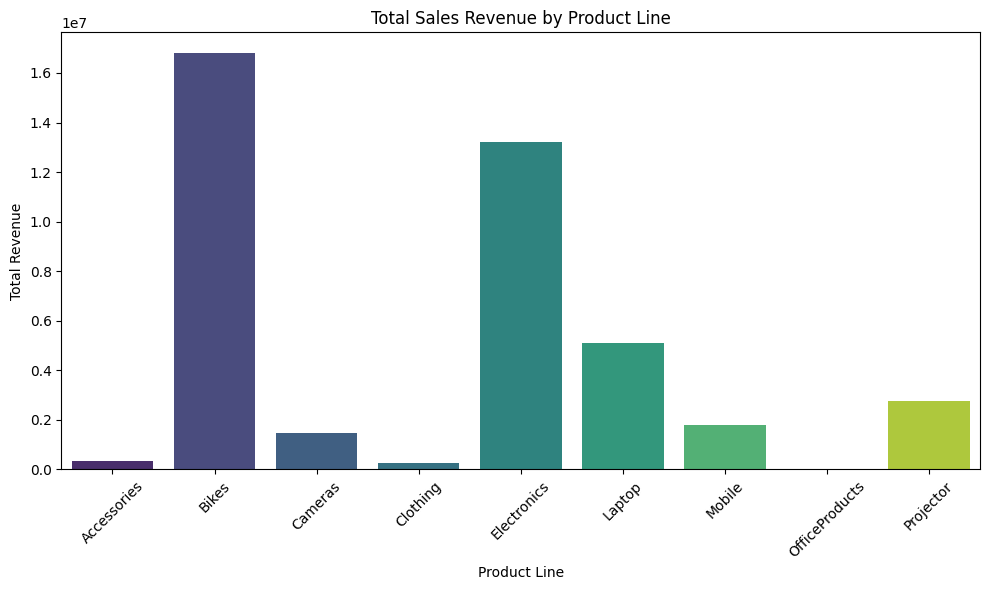

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chart 1: 按产品线 (product_line) 汇总的总销售额
plt.figure(figsize=(10,6))
sales_by_product_line = df.groupby('product_line')['total_amount'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_product_line.index, y=sales_by_product_line.values, palette="viridis")
plt.title('Total Sales Revenue by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-22-4dd22f237e96>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_state = df.groupby('state_province')['total_amount'].sum().sort_values(ascending=False)
<ipython-input-22-4dd22f237e96>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_state.index, y=sales_by_state.values, palette="magma")


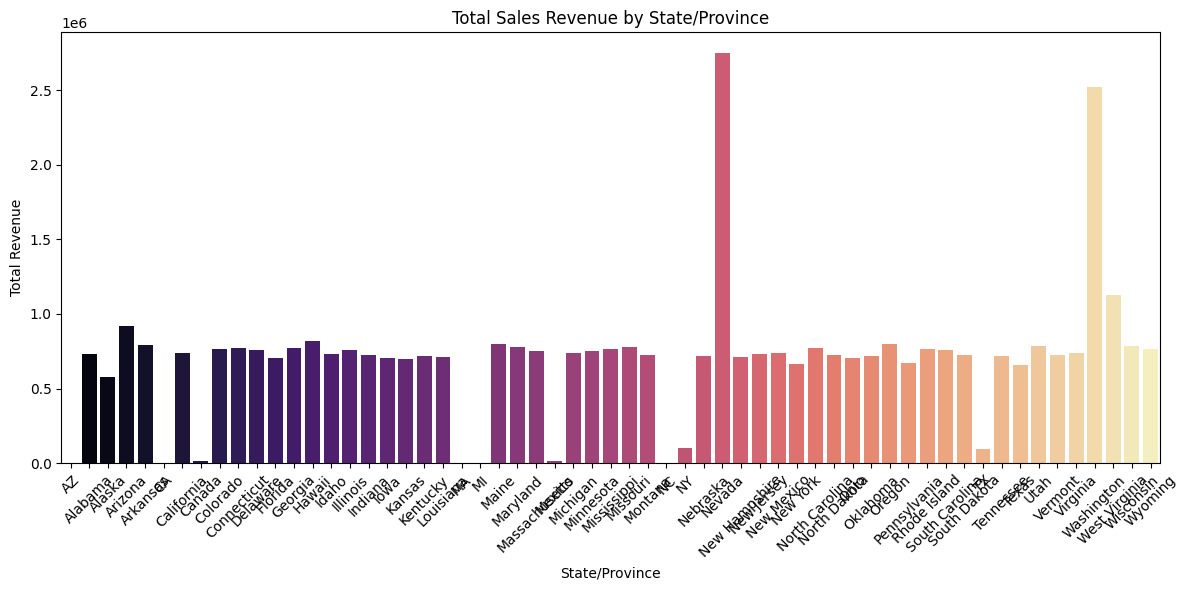

In [ ]:
plt.figure(figsize=(12,6))
sales_by_state = df.groupby('state_province')['total_amount'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_state.index, y=sales_by_state.values, palette="magma")
plt.title('Total Sales Revenue by State/Province')
plt.xlabel('State/Province')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-23-35fc7f97b70e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_order_type = df.groupby('order_type')['total_amount'].sum()


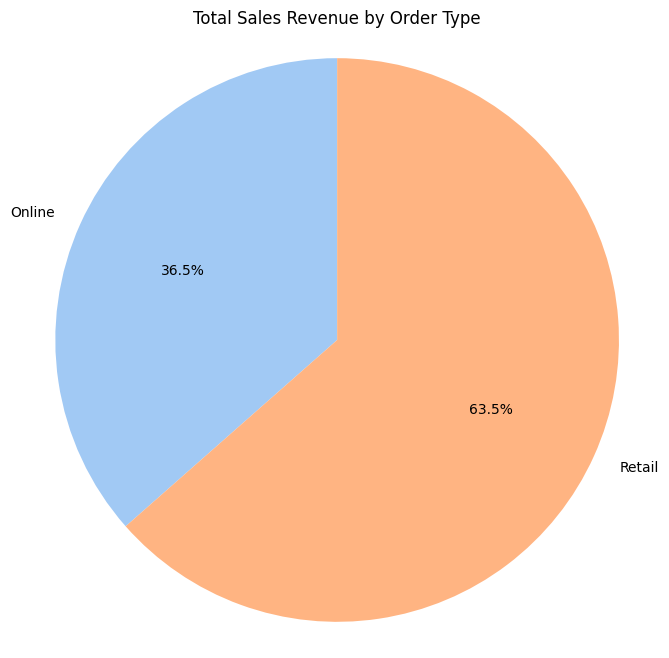

In [ ]:
plt.figure(figsize=(8,8))
sales_by_order_type = df.groupby('order_type')['total_amount'].sum()
plt.pie(sales_by_order_type, labels=sales_by_order_type.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Total Sales Revenue by Order Type')
plt.axis('equal')  # 保证饼图为圆形
plt.show()

## Covariance

➡️ Assignment Task
- Create a covariance matrix using all of the applicable independent variables
- In 100 words or less, describe what insight you can derive from the covariance matrix.  What does it tell us about the data?  


In [ ]:
# Create a covariance matrix using the numeric columns
numeric_cols = ['quantity', 'product_price', 'total_amount']
cov_matrix = df[numeric_cols].cov()

print("Covariance Matrix:")
print(cov_matrix)



Covariance Matrix:
                   quantity  product_price  total_amount
quantity          12.374420    -169.498027  3.895994e+04
product_price   -169.498027  668556.829766  8.938059e+05
total_amount   38959.935784  893805.907230  1.366128e+08


The covariance matrix suggests how numeric variables circulate together. big fantastic values imply that as one variable will increase, the alternative has a tendency to increase; terrible values mean the opposite. as an instance, a excessive positive covariance among amount and total_amount means that whilst amount is going up, overall sales also upward push. this is anticipated due to the fact that total_amount depends on both quantity and product price. word that covariance is scale-based, so it does no longer immediately compare the electricity of relationships throughout variables except standardized (for instance, by using the usage of correlation).